In [22]:
import torch

In [71]:
import torch.nn.functional as F

class LogisticRegression(torch.nn.Module ):
    """逻辑回归模型"""
    def __init__(self):
        super().__init__()
        self.fc = torch.nn.Linear(1, 1)

    def forward(self, x):
        """前向传播"""
        return F.sigmoid(self.fc(x)) #self.fc(x) = x @ self.weight + self.bias
                                     #把self.fc(x)输入进sigmoid函数里，————概率

In [73]:
#获取数据和标签
x = torch.Tensor([[1.0], [2.0], [3.0]])
y = torch.Tensor([[0], [0], [1]])

In [75]:
#实例化
model = LogisticRegression()
#找一个损失函数loss function
loss_function = torch.nn.BCELoss() #二维交叉熵 ......entropy
#找一个优化器optimizer, 通过调整模型参数（如权重和偏置）来最小化损失函数
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)

In [77]:
total_loss = []
for i in range(5000):
    #前向传播
    y_pre = model(x)
    loss = loss_function(y_pre, y) #损失函数的用法

    #后向传播
    optimizer.zero_grad() #清零梯度，因为pytorch的梯度默认是累加的，需要手动清空
    loss.backward() #从损失值loss计算全部组参数的梯度，用于optimizer更新、调整参数

    #更新、调整参数
    optimizer.step()
    total_loss.append(loss.item()) #.item()将额外信息剥离，只保留数值，这样可以与python的
                                   #原生类型联系

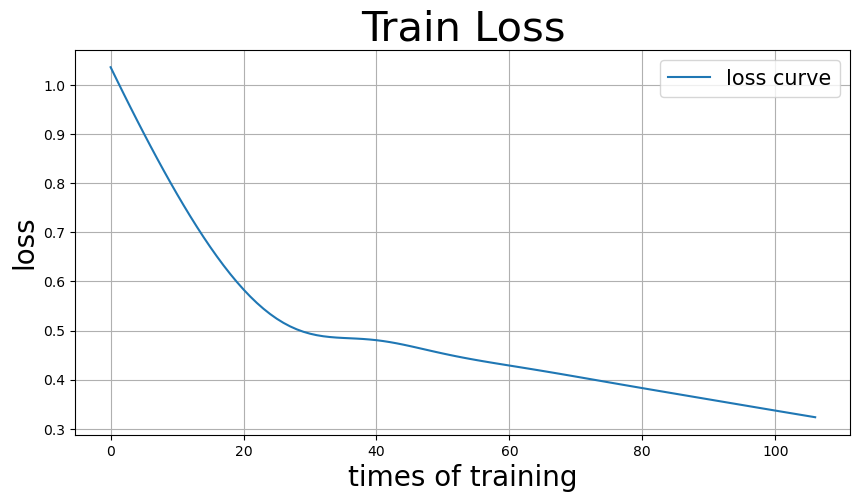

In [69]:
#画图啦
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(total_loss, label="loss curve")
plt.xlabel("times of training", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.title("Train Loss", fontsize=30)
plt.legend(fontsize = 15)
plt.grid()
plt.show()